<a href="https://colab.research.google.com/github/Rafazand/PCVK_2024/blob/main/pcvk_Jobsheet3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Brightness Transformation

mengubah Tingkat kecerahan citra
--------------------------------
masukkan nilai kecerahan: 50


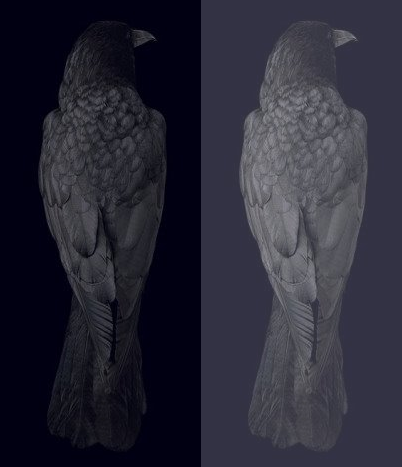

In [3]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print ('mengubah Tingkat kecerahan citra')
print ('--------------------------------')

try:
  brightness =int (input('masukkan nilai kecerahan: '))
except ValuError:
    print('Error, not a number')

original = cv.imread('bird.png')
brightness_image = np.zeros(original.shape,original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness,0,255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original,brightness_image))
cv2_imshow(final_frame)

Contrast Transformation

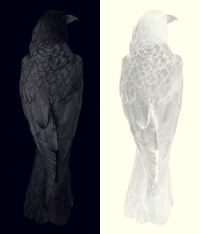

In [4]:
# Import library yang dibutuhkan
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Baca citra
image = cv.imread('bird.png')
image = cv.resize(image, (0,0), fx=0.5, fy=0.5)
# Operasi inverse citra
inverse_image = 255 - image

final_frame = cv.hconcat ((image,inverse_image))
cv2_imshow(final_frame)

Mengubah Tingkat Kecerahan dan Kontras Citra
--------------------------------------------
Masukkan nilai kecerahan: 50
Masukkan nilai kontras: 100


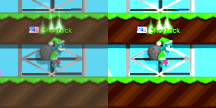

In [5]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print('Mengubah Tingkat Kecerahan dan Kontras Citra')
print('--------------------------------------------')

# Input untuk brightness
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

# Input untuk contrast
try:
    contrast = int(input('Masukkan nilai kontras: '))
except ValueError:
    print('Error, not a number')

# Baca citra
image = cv.imread('goblin.png')
original = cv.resize(image, (0,0), fx=0.5, fy=0.5)
brightness_contrast_image = np.zeros(original.shape, original.dtype)

# Menghitung factor untuk contrast
factor = (259 * (contrast + 255)) / (255 * (259 - contrast))

# Akses per piksel untuk brightness dan contrast
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            # Ubah kecerahan dan kontras
            new_value = factor * (original[y, x, c] - 128) + 128 + brightness
            brightness_contrast_image[y, x, c] = np.clip(new_value, 0, 255)

final_frame = cv.hconcat((original, brightness_contrast_image))
cv2_imshow(final_frame)


Mengubah Tingkat Kecerahan dengan Transformasi Logaritmik
----------------------------------------------------------
Masukkan nilai kecerahan: 50


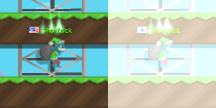

In [9]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print('Mengubah Tingkat Kecerahan dengan Transformasi Logaritmik')
print('----------------------------------------------------------')

# Input untuk brightness (nilai konstanta c)
try:
    brightness = float(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')
    brightness = 1.0  # Set default jika input tidak valid

# Baca citra
image = cv.imread('goblin.png')
original = cv.resize(image, (0,0), fx=0.5, fy=0.5)

# Pastikan citra diubah ke tipe float32 agar transformasi lebih presisi
original_float = np.float32(original)

# Inisialisasi matriks kosong untuk menyimpan hasil transformasi logaritmik
log_brightness_image = np.zeros(original.shape, dtype=np.float32)

# Terapkan transformasi logaritmik per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            # Terapkan transformasi logaritmik
            new_value = brightness * np.log(1 + original_float[y, x, c])
            # Batasi nilai piksel agar tidak melebihi 255
            new_value = min(new_value, 255)
            log_brightness_image[y, x, c] = new_value

# Ubah hasil ke uint8 agar dapat ditampilkan sebagai citra
log_brightness_image = np.uint8(log_brightness_image)

# Gabungkan citra asli dan hasil untuk perbandingan
final_frame = cv.hconcat([original, log_brightness_image])

# Tampilkan gambar
cv2_imshow(final_frame)


Transformasi Grayscale dengan Metode Averaging, Lightness, dan Luminance
------------------------------------------------------------------------
Metode Averaging


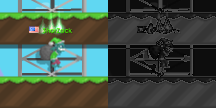

Metode Lightness


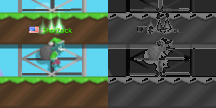

Metode Luminance


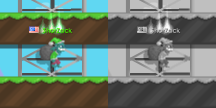

In [12]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print('Transformasi Grayscale dengan Metode Averaging, Lightness, dan Luminance')
print('------------------------------------------------------------------------')

# Baca citra
image = cv.imread('goblin.png')  # Ganti dengan path gambar yang kamu gunakan
original = cv.resize(image, (0, 0), fx=0.5, fy=0.5)

# Pisahkan channel warna (R, G, B)
B, G, R = cv.split(original)

# 1. Metode Averaging
grayscale_avg = (R + G + B) // 3
grayscale_avg_colored = cv.merge([grayscale_avg] * 3)  # Menggabungkan channel grayscale untuk ditampilkan

# 2. Metode Lightness
grayscale_lightness = (np.maximum(R, np.maximum(G, B)) + np.minimum(R, np.minimum(G, B))) // 2
grayscale_lightness_colored = cv.merge([grayscale_lightness] * 3)  # Menggabungkan channel grayscale untuk ditampilkan

# 3. Metode Luminance
grayscale_luminance = 0.21 * R + 0.72 * G + 0.07 * B
grayscale_luminance = np.uint8(grayscale_luminance)  # Konversi ke uint8 agar sesuai format citra
grayscale_luminance_colored = cv.merge([grayscale_luminance] * 3)  # Menggabungkan channel grayscale untuk ditampilkan

# Tampilkan gambar asli dan hasil dari ketiga metode secara berdampingan
print('Metode Averaging')
result_avg = cv.hconcat([original, grayscale_avg_colored])
cv2_imshow(result_avg)

print('Metode Lightness')
result_lightness = cv.hconcat([original, grayscale_lightness_colored])
cv2_imshow(result_lightness)

print('Metode Luminance')
result_luminance = cv.hconcat([original, grayscale_luminance_colored])
cv2_imshow(result_luminance)


Menyorot Warna Biru dan Mengubah Bagian Lain Menjadi Grayscale menggunakan Metode Luminance
-------------------------------------------------------------------------------------------
Hasil dengan warna biru yang ditampilkan dan area lainnya menjadi grayscale:


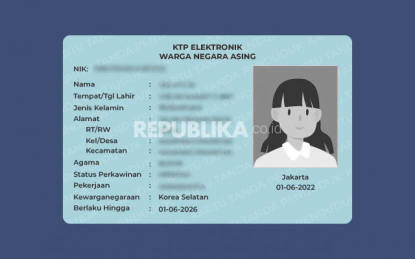

In [13]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print('Menyorot Warna Biru dan Mengubah Bagian Lain Menjadi Grayscale menggunakan Metode Luminance')
print('-------------------------------------------------------------------------------------------')

# Baca citra
image = cv.imread('ktp.jpg')  # Ganti dengan path gambar yang kamu gunakan
original = cv.resize(image, (0, 0), fx=0.5, fy=0.5)

# Pisahkan channel warna
B, G, R = cv.split(original)

# 1. Metode Luminance untuk grayscale
grayscale_luminance = 0.21 * R + 0.72 * G + 0.07 * B
grayscale_luminance = np.uint8(grayscale_luminance)  # Konversi ke uint8 agar sesuai format citra
grayscale_luminance_colored = cv.merge([grayscale_luminance] * 3)  # Menggabungkan channel grayscale untuk ditampilkan

# 2. Buat mask untuk warna biru
mask_blue = (B > 100) & (B > G) & (B > R)  # Saring area yang memiliki nilai biru yang dominan

# 3. Terapkan mask untuk menampilkan warna biru pada citra grayscale
highlighted_image = np.where(mask_blue[..., None], original, grayscale_luminance_colored)

# Tampilkan hasil
print('Hasil dengan warna biru yang ditampilkan dan area lainnya menjadi grayscale:')
cv2_imshow(highlighted_image)


Citra Asli


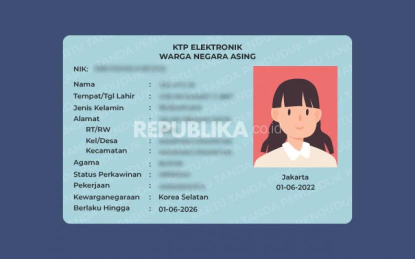

Citra dengan Warna Biru diubah Menjadi Grayscale


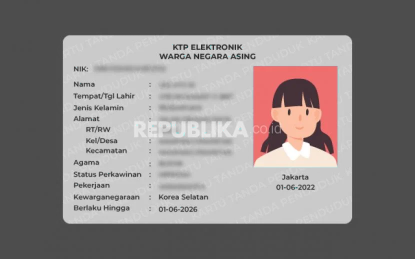

In [14]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# Baca citra
image = cv.imread('ktp.jpg')  # Ganti dengan path gambar yang kamu gunakan
original = cv.resize(image, (0, 0), fx=0.5, fy=0.5)

# Pisahkan channel warna (B, G, R)
B, G, R = cv.split(original)

# 1. Identifikasi piksel biru (B > G dan B > R)
mask_blue = (B > G) & (B > R)

# 2. Konversi piksel biru ke grayscale menggunakan metode luminance
grayscale_luminance = 0.21 * R + 0.72 * G + 0.07 * B
grayscale_luminance = np.uint8(grayscale_luminance)  # Konversi ke uint8 agar sesuai format citra

# Buat citra hasil dengan warna biru menjadi grayscale
result_image = original.copy()

# Ubah bentuk grayscale_luminance[mask_blue] menjadi 3D
grayscale_luminance_masked = grayscale_luminance[mask_blue][:, np.newaxis]  # Tambahkan dimensi baru
grayscale_luminance_masked = np.repeat(grayscale_luminance_masked, 3, axis=1)  # Ulangi sepanjang sumbu 1

# Atur nilai grayscale untuk channel R, G, dan B untuk piksel yang diidentifikasi sebagai biru
result_image[mask_blue] = grayscale_luminance_masked

# Tampilkan gambar asli dan gambar hasil
print('Citra Asli')
cv2_imshow(original)

print('Citra dengan Warna Biru diubah Menjadi Grayscale')
cv2_imshow(result_image)